### O objetivo deste mini-projeto é aplicar técnicas de Machine Learning em Marketing Digital para prever o número de usuários convertidos.

### Cenário fictício: Você  foi  contratado  como  Cientista  de  Dados  por  uma  empresa  que  comercializa produtos digitais. A empresa trabalha diversas estratégias de Marketing Digital e gostaria de ter  um modelo de Machine Learning capaz de prever quantos usuários serão convertidos(ou seja,  quantas pessoas comprarão os produtos da empresa) após cada campanha. Conseguindo fazer a  previsão, a empresa pode ter uma ideia mais clara de quanto deve investir em cada campanha e  o retorno esperado.

### Pergunta de negócio: Qual o número provável de usuários convertidos? (Regressão)

In [1]:
# Carrega as bibliotecas necessárias
options(warn = -1)
library(tidyverse)
library(corrplot) # para visualizar matrizes de correlação.

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



In [2]:
#Carregando o dataset
df_md <- read_csv('dataset.csv')
head(df_md)

Rows: 500 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): valor_gasto_campanha, numero_visualizacoes, numero_cliques, usuario...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


valor_gasto_campanha,numero_visualizacoes,numero_cliques,usuarios_convertidos
<dbl>,<dbl>,<dbl>,<dbl>
875,4390,54,30
1451,7120,90,72
1232,6198,67,47
1099,5554,70,63
656,3336,41,34
656,3388,34,18


In [3]:
#Tipo de dados
glimpse(df_md)

Rows: 500
Columns: 4
$ valor_gasto_campanha <dbl> 875, 1451, 1232, 1099, 656, 656, 558, 1366, 1101,…
$ numero_visualizacoes <dbl> 4390, 7120, 6198, 5554, 3336, 3388, 2874, 6877, 5…
$ numero_cliques       <dbl> 54, 90, 67, 70, 41, 34, 31, 79, 71, 86, 28, 93, 8…
$ usuarios_convertidos <dbl> 30, 72, 47, 63, 34, 18, 25, 61, 58, 74, 7, 75, 65…


### Análise Exploratória de Dados

In [4]:
summary(df_md)
# A média e a mediana são valores próximos o que indica que os dados podem seguir uma distribuição normal. 

 valor_gasto_campanha numero_visualizacoes numero_cliques  
 Min.   : 505.0       Min.   :2376         Min.   :  9.00  
 1st Qu.: 741.5       1st Qu.:3710         1st Qu.: 47.00  
 Median :1013.0       Median :5112         Median : 65.00  
 Mean   : 998.6       Mean   :5005         Mean   : 64.57  
 3rd Qu.:1256.5       3rd Qu.:6280         3rd Qu.: 81.25  
 Max.   :1493.0       Max.   :7528         Max.   :116.00  
 usuarios_convertidos
 Min.   :  4.00      
 1st Qu.: 36.00      
 Median : 49.00      
 Mean   : 49.63      
 3rd Qu.: 63.00      
 Max.   :101.00      

In [5]:
cor_matrix <- cor(df_md)
cor_matrix

,valor_gasto_campanha,numero_visualizacoes,numero_cliques,usuarios_convertidos
valor_gasto_campanha,1.0000000,0.9978269,0.9376128,0.8501564
numero_visualizacoes,0.9978269,1.0000000,0.9365860,0.8481639
numero_cliques,0.9376128,0.9365860,1.0000000,0.9265650
usuarios_convertidos,0.8501564,0.8481639,0.9265650,1.0000000


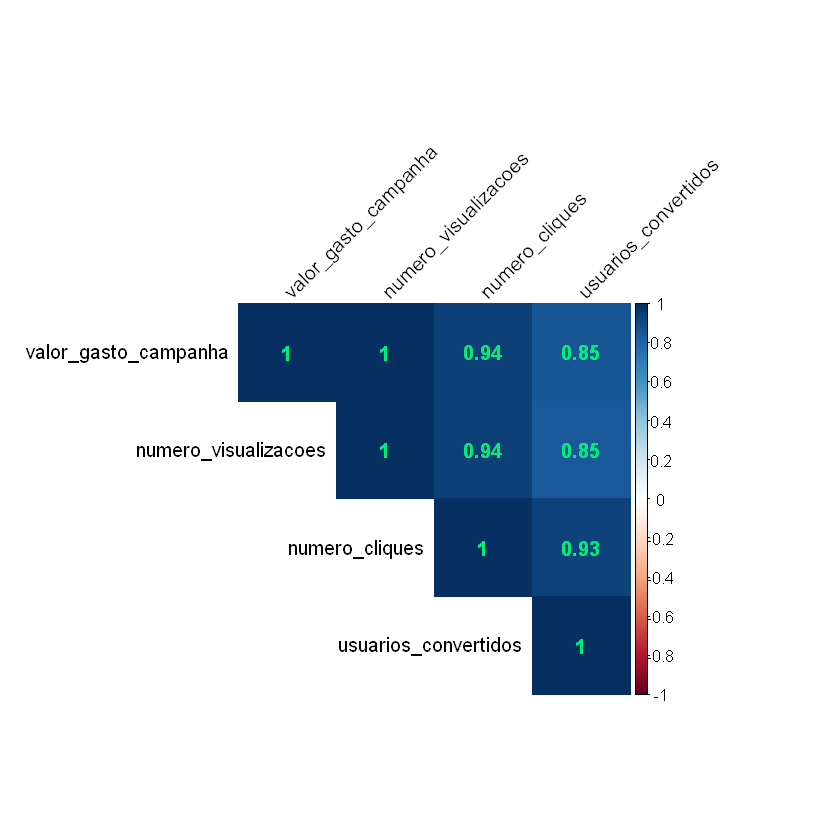

In [6]:
corrplot(cor_matrix, 
         method = 'color', #método de representação gráfica da matriz de correlação. 
         type = 'upper', # plotar apenas a metade superior da matriz de correlação.
         addCoef.col = 'springgreen2', #define a cor dos coeficientes de correlação
         tl.col = "black", #define a cor do texto dos rótulos 
         tl.srt = 45) #define a inclinação (ângulo) dos rótulos

### Variável alvo: "usuários convertidos";
### Entre a variável alvo e as variáveis preditoras eu quero a maior correlação possível ;
### Entre as variáveis preditoras eu quero a menor correlação possível;
### Verificamos, portanto, que este dataset apresenta um grande problema de multicolinearidade; 

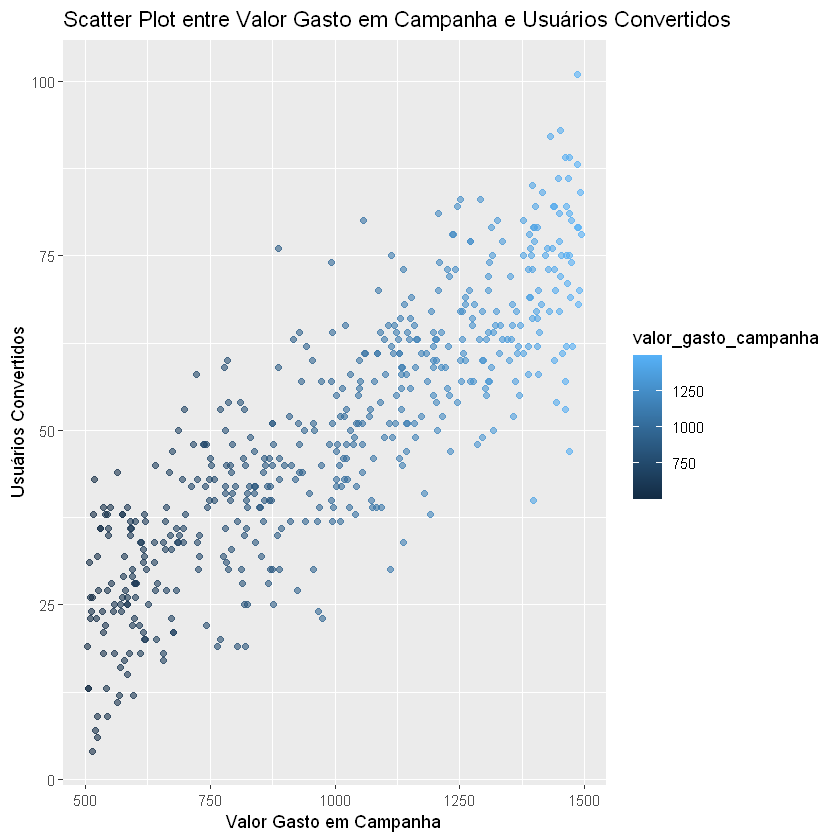

In [7]:
# Scatter plot entre Valor Gasto em Campanha e Usuários Convertidos
ggplot(df_md, aes(x=valor_gasto_campanha, y=usuarios_convertidos)) +
  geom_point(aes(color=valor_gasto_campanha), alpha=0.6) +
  ggtitle("Scatter Plot entre Valor Gasto em Campanha e Usuários Convertidos") +
  xlab("Valor Gasto em Campanha") +
  ylab("Usuários Convertidos")

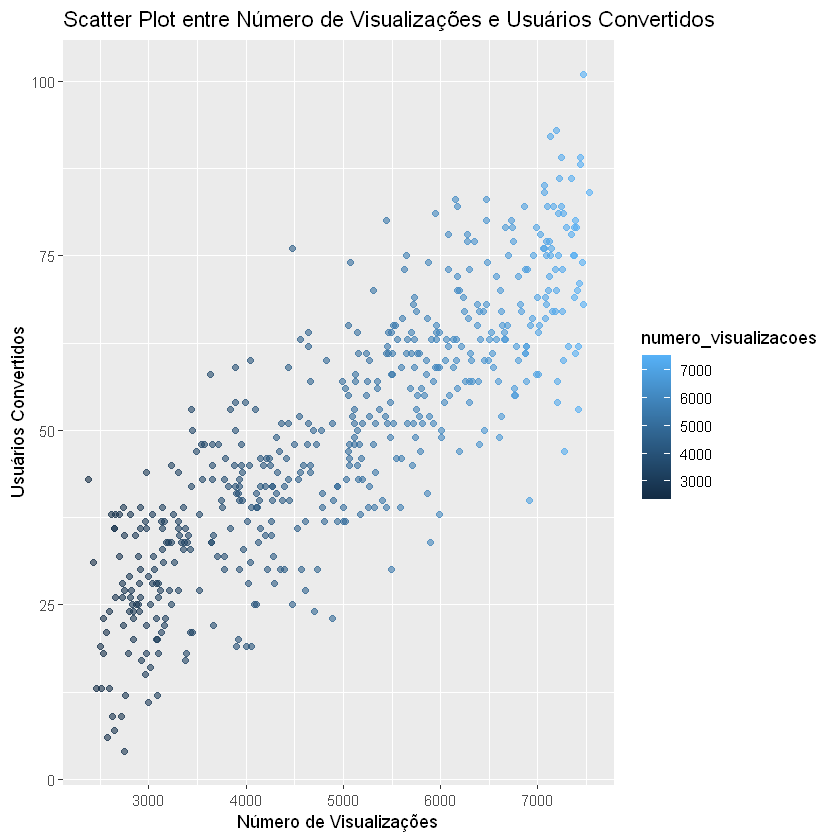

In [8]:
# Scatter plot entre Número de Visualizações e Usuários Convertidos
ggplot(df_md, aes(x=numero_visualizacoes, y=usuarios_convertidos)) +
  geom_point(aes(color=numero_visualizacoes), alpha=0.6) +
  ggtitle("Scatter Plot entre Número de Visualizações e Usuários Convertidos") +
  xlab("Número de Visualizações") +
  ylab("Usuários Convertidos")

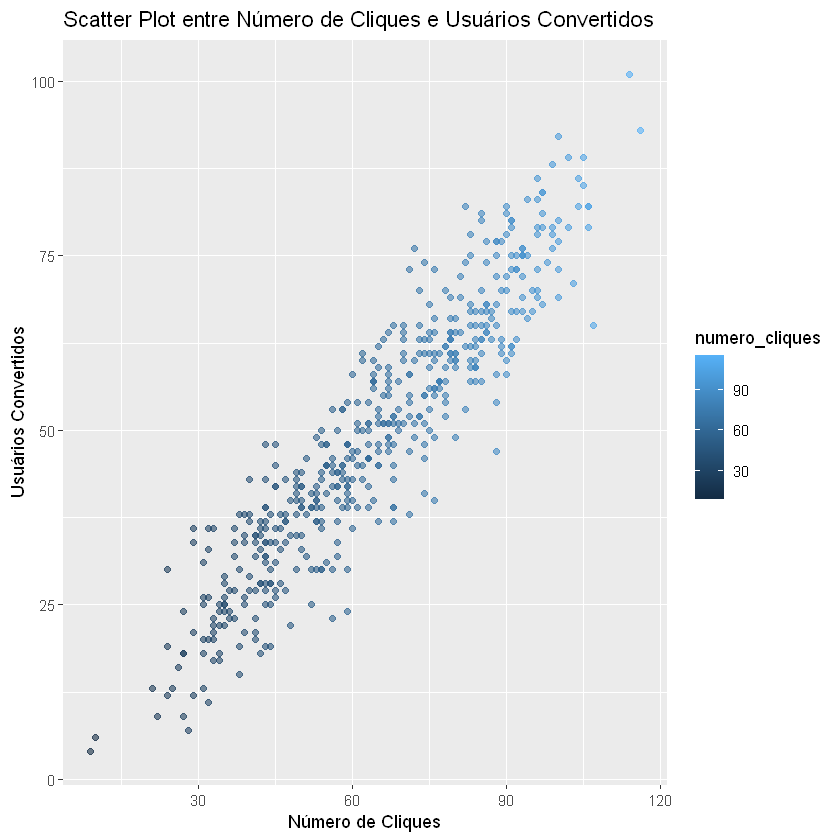

In [9]:
# Scatter plot entre Número de Cliques e Usuários Convertidos
ggplot(df_md, aes(x=numero_cliques, y=usuarios_convertidos)) +
  geom_point(aes(color=numero_cliques), alpha=0.6) +
  ggtitle("Scatter Plot entre Número de Cliques e Usuários Convertidos") +
  xlab("Número de Cliques") +
  ylab("Usuários Convertidos")

### Modelagem

In [10]:
# Versão 1 do Modelo - Regressão Linear Múltipla
modelo_v1 <- lm(usuarios_convertidos ~ valor_gasto_campanha + numero_visualizacoes + numero_cliques, data = df_md)
modelo_v1


Call:
lm(formula = usuarios_convertidos ~ valor_gasto_campanha + numero_visualizacoes + 
    numero_cliques, data = df_md)

Coefficients:
         (Intercept)  valor_gasto_campanha  numero_visualizacoes  
           -1.563463              0.007797             -0.003505  
      numero_cliques  
            0.943882  


In [11]:
summary(modelo_v1)


Call:
lm(formula = usuarios_convertidos ~ valor_gasto_campanha + numero_visualizacoes + 
    numero_cliques, data = df_md)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.188  -4.104  -0.114   4.166  18.420 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.563463   1.081645  -1.445    0.149    
valor_gasto_campanha  0.007797   0.015754   0.495    0.621    
numero_visualizacoes -0.003505   0.003139  -1.117    0.265    
numero_cliques        0.943882   0.042275  22.327   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.865 on 496 degrees of freedom
Multiple R-squared:  0.8617,	Adjusted R-squared:  0.8609 
F-statistic:  1030 on 3 and 496 DF,  p-value: < 2.2e-16


### Componentes do Sumário:

### Residuals:

- Os resíduos são as diferenças entre os valores observados e os valores previstos pelo modelo. 
- Os quartis dos resíduos (Min, 1Q, Median, 3Q, Max) dão uma ideia da distribuição dos erros. Em geral, você gostaria que esses valores fossem distribuídos simetricamente em torno de zero, o que indica que o modelo faz um bom trabalho na previsão.

### Coefficients

- (Intercept): Este é o valor da variável dependente (usuários convertidos) quando todas as variáveis independentes são zero. O valor é -1.563, mas o valor-p associado é maior que 0,05, o que indica que o intercepto não é significativamente diferente de zero neste modelo.
- Valor_gasto_campanha: O coeficiente é 0.0078, mas o valor-p associado é 0.621, o que indica que essa variável não é estatisticamente significativa na previsão de usuários convertidos, pelo menos neste modelo.
- Numero_visualizacoes: O coeficiente é -0.0035, com um valor-p de 0.265. Isso também sugere que a variável não é significativa.
- **Numero_cliques: O coeficiente é 0.944, com um valor-p extremamente baixo (< 2e-16). Isso indica que essa variável é altamente significativa na previsão de usuários convertidos.**

###  Outras Métricas

- Residual standard error: Este é uma medida da qualidade do modelo. Quanto menor, melhor o modelo. Neste caso, é 6.865.
- Multiple R-squared e Adjusted R-squared: Estes são indicadores da "qualidade" do modelo em termos de sua capacidade de prever a variável dependente. Um valor mais próximo de 1 é geralmente melhor. Neste caso, eles são relativamente altos (0.8617 e 0.8609, respectivamente), o que é bom.
- 86.17% da variabilidade na variável dependente é explicada pelo modelo de regressão.
- F-statistic e p-value: Um teste F é realizado para determinar se o modelo como um todo é significativo. O valor F é 1030 e o  valor-p associado é muito baixo (< 2.2e-16), indicando que o modelo é significativo.

### Interpretação Final
- O modelo parece fazer um bom trabalho na previsão de "usuários convertidos" (R-squared alto), mas apenas a variável "número de cliques" é estatisticamente significativa na previsão. Isso pode implicar que "número de cliques" é a principal variável que você deve se concentrar para entender as conversões de usuários.As outras variáveis (valor gasto em campanha e número de visualizações) não são significativas neste modelo, o que sugere que elas podem não ser úteis para prever a variável dependente, ou que outros fatores podem estar em jogo, como **multicolinearidade**.

### Vamos realizar agora uma  nova versão do modelo somente com a variável preditora que se saiu melhor nos testes anteriores.

In [12]:
# Versão 2 do Modelo - Regressão Linear Simples
modelo_v2 <- lm(usuarios_convertidos ~ numero_cliques, data = df_md)
summary(modelo_v2)


Call:
lm(formula = usuarios_convertidos ~ numero_cliques, data = df_md)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.7207  -4.1067  -0.1993   4.2421  20.3177 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.99028    1.00606  -2.972   0.0031 ** 
numero_cliques  0.81490    0.01482  54.973   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.93 on 498 degrees of freedom
Multiple R-squared:  0.8585,	Adjusted R-squared:  0.8582 
F-statistic:  3022 on 1 and 498 DF,  p-value: < 2.2e-16


### Apesar da boa performance do modelo, ele ainda é um modelo muito simples, visto que eu só consigo explicar o comportamento da variável alvo apenas com a variável 'número de cliques' que pode não ajudar na resolução do problema de negócio. 

### Agora vamos realizar a Versão 3 do Modelo - Engenharia de Atributos Antes da Regressão Linear Múltipla

In [13]:
# Criar a nova variável taxa_de_clique
# a nova coluna taxa_de_clique está sendo criada ao dividir o número de cliques pelo número de visualizações para 
# calcular a taxa de cliques.
# Esta taxa expressa a proporção de visualizações que resultam em cliques. 
df_md$taxa_de_clique <- df_md$numero_cliques / df_md$numero_visualizacoes

In [14]:
head(df_md)

valor_gasto_campanha,numero_visualizacoes,numero_cliques,usuarios_convertidos,taxa_de_clique
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
875,4390,54,30,0.01230068
1451,7120,90,72,0.01264045
1232,6198,67,47,0.01080994
1099,5554,70,63,0.01260353
656,3336,41,34,0.01229017
656,3388,34,18,0.01003542


In [15]:
# Verificamos se algum valor ficou igual a zero (sempre verifique quando realizar divisão de valores)
any(df_md$taxa_de_clique == 0)

[1] FALSE

In [16]:
# Calculando a matriz de correlação
cor_matrix <- cor(df_md)
cor_matrix

,valor_gasto_campanha,numero_visualizacoes,numero_cliques,usuarios_convertidos,taxa_de_clique
valor_gasto_campanha,1.00000000,0.99782688,0.9376128,0.8501564,0.06299124
numero_visualizacoes,0.99782688,1.00000000,0.9365860,0.8481639,0.05541041
numero_cliques,0.93761282,0.93658601,1.0000000,0.9265650,0.38240900
usuarios_convertidos,0.85015638,0.84816386,0.9265650,1.0000000,0.39788311
taxa_de_clique,0.06299124,0.05541041,0.3824090,0.3978831,1.00000000


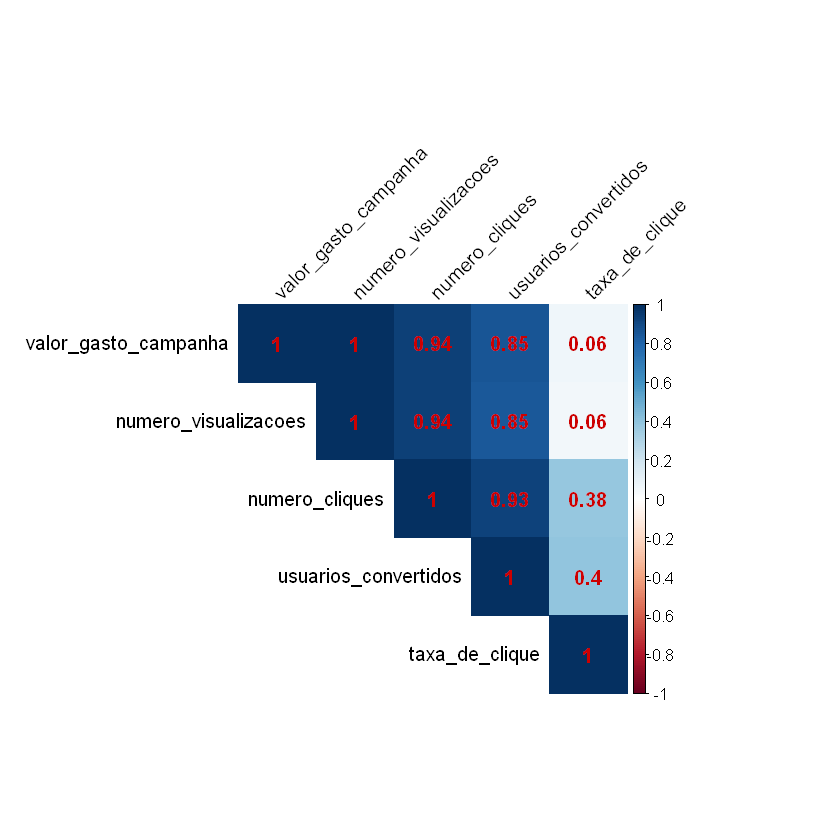

In [17]:
# Corrplot
corrplot(cor_matrix, 
         method = 'color', 
         type = 'upper', 
         addCoef.col = 'red3', 
         tl.col = "black", 
         tl.srt = 45)

### Agora eu posso descartar as variáveis número de visualizações e número de cliques.
### Verificamos também que a taxa de clique e o valor gasto na campanha, apresentam baixa correlação: 0,06, assim as variáveis estão com uma correlação próximas à zero;
### A taxa de clique (variável preditora) com a variável alvo apresentam correlação de 0,4, uma correlação razoável.
### Agora podemos criar a terceira versão do modelo


In [18]:
# Versão 3 do modelo
modelo_v3 <- lm(usuarios_convertidos ~ valor_gasto_campanha + taxa_de_clique, data = df_md)
summary(modelo_v3)


Call:
lm(formula = usuarios_convertidos ~ valor_gasto_campanha + taxa_de_clique, 
    data = df_md)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.8286  -4.5071  -0.1693   4.2813  20.7444 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -4.785e+01  2.601e+00  -18.39   <2e-16 ***
valor_gasto_campanha  5.105e-02  1.102e-03   46.34   <2e-16 ***
taxa_de_clique        3.613e+03  1.868e+02   19.34   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.336 on 497 degrees of freedom
Multiple R-squared:  0.8418,	Adjusted R-squared:  0.8412 
F-statistic:  1322 on 2 and 497 DF,  p-value: < 2.2e-16


### Componentes do Sumário

### Residuals:
Esta seção mostra um resumo estatístico dos resíduos (diferença entre os valores observados e os valores previstos pelo modelo).
- Min, 1Q, Median, 3Q, Max descrevem a distribuição dos resíduos. Seu objetivo é que esses valores sejam distribuídos simetricamente em torno de zero. Nesse caso, parece que a mediana está próxima de zero, o que é um bom sinal.

### Coefficients:
Esta seção descreve os coeficientes do modelo de regressão.

- Estimate: A estimativa dos coeficientes. Por exemplo, para cada unidade de aumento no valor_gasto_campanha, a variável usuarios_convertidos aumenta em média 0.05105 unidades, mantendo a taxa_de_clique constante.  
- Std. Error: O erro padrão dos coeficientes, uma medida da variação dos coeficientes.  
- t value: A estatística t, usada para testar a hipótese nula de que o coeficiente é igual a zero (sem efeito). Um valor t alto pode indicar que a variável é significativa.  
- Pr(>|t|): O valor-p associado à estatística t. Um valor muito baixo (< 0,05) indica que você pode rejeitar a hipótese nula. Isso significa que o coeficiente é estatisticamente significativo para prever a variável alvo. **Todos os coeficientes são altamente significativos (p-valor < 2e-16), indicando que ambos são importantes preditores da variável alvo.**

### Outras Estatísticas:
- Residual standard error: É uma medida da qualidade do ajuste do modelo aos dados. Quanto menor, melhor, embora deva ser interpretado no contexto do problema.
- Multiple R-squared e Adjusted R-squared: São medidas que indicam a proporção da variação na variável dependente que é explicada pelo modelo. O seu valor é de 0,8418, o que é relativamente alto e indica um bom ajuste.
- F-statistic e p-value: Estas estatísticas testam a hipótese nula de que todos os coeficientes de regressão são iguais a zero. Dado o valor extremamente baixo do valor-p, você pode rejeitar essa hipótese.

### Interpretação:

- O modelo explica aproximadamente 84,18% da variação em usuarios_convertidos, o que é bom.
- **O coeficiente para valor_gasto_campanha é 0,05105 e para taxa_de_clique é 3613. Isso significa que, mantendo todas as outras variáveis constantes, um aumento de uma unidade em valor_gasto_campanha resultará em um aumento de 0,05105 unidades em usuarios_convertidos e um aumento de uma unidade na taxa_de_clique aumentará usuarios_convertidos em 3613 unidades.**
- Todos os preditores são significativos, com valores-p muito baixos.
- O modelo é estatisticamente significativo, conforme indicado pelo valor-p próximo a zero para a estatística F.

Lembre-se de que essas são interpretações puramente estatísticas. A validade prática desses resultados deve ser avaliada no contexto do problema de negócio que você está tentando resolver.

- Vamos checar as suposições do modelo de regressão:

In [19]:
# Obter os resíduos do modelo
residuals <- resid(modelo_v3)

`geom_smooth()` using formula = 'y ~ x'


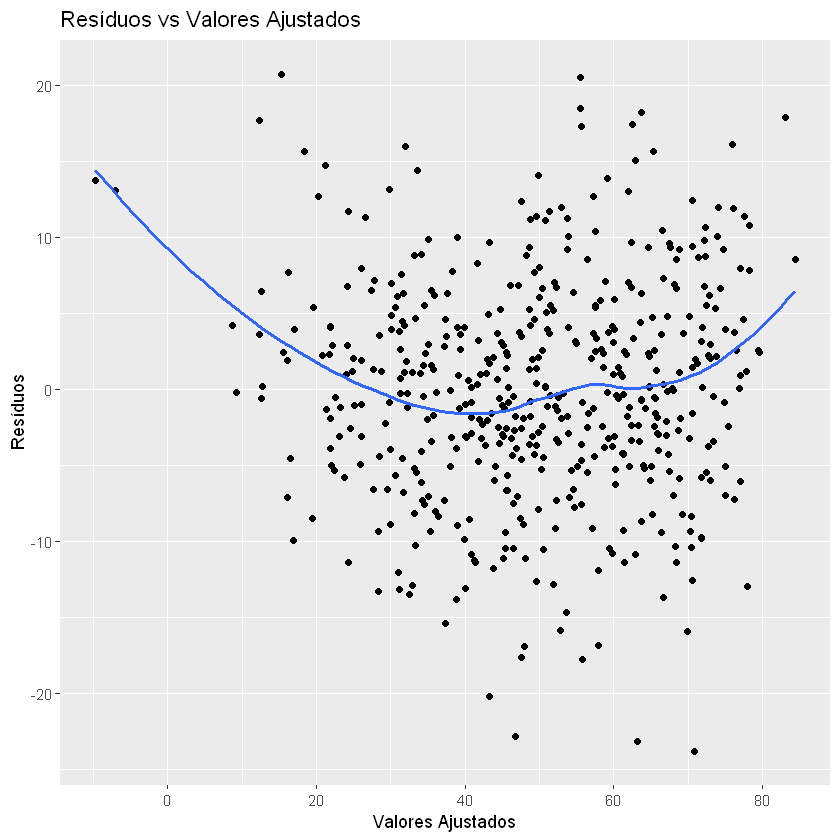

In [20]:
# Gráfico de Resíduos vs Valores Ajustados
# Este gráfico ajuda a verificar a suposição de homocedasticidade. 
# Você espera ver uma nuvem de pontos que não exiba nenhum padrão claro.
ggplot(df_md, aes(x = predict(modelo_v3), y = residuals)) +
  geom_point() +
  geom_smooth(se = FALSE, method = 'loess') +
  ggtitle("Resíduos vs Valores Ajustados") +
  xlab("Valores Ajustados") +
  ylab("Resíduos")

**Cada ponto no gráfico:** Cada ponto no gráfico representa uma observação nos seus dados. O eixo x desse ponto é o valor predito (ajustado) pelo modelo para essa observação, e o eixo y é o resíduo correspondente para essa observação. 

**A linha suavizada (gerada pelo método 'loess' no geom_smooth)** acompanha os pontos no gráfico e oferece uma representação visual da tendência geral nos dados. Ela é uma estimativa suavizada da relação entre os valores ajustados (previstos pelo modelo) e os resíduos.

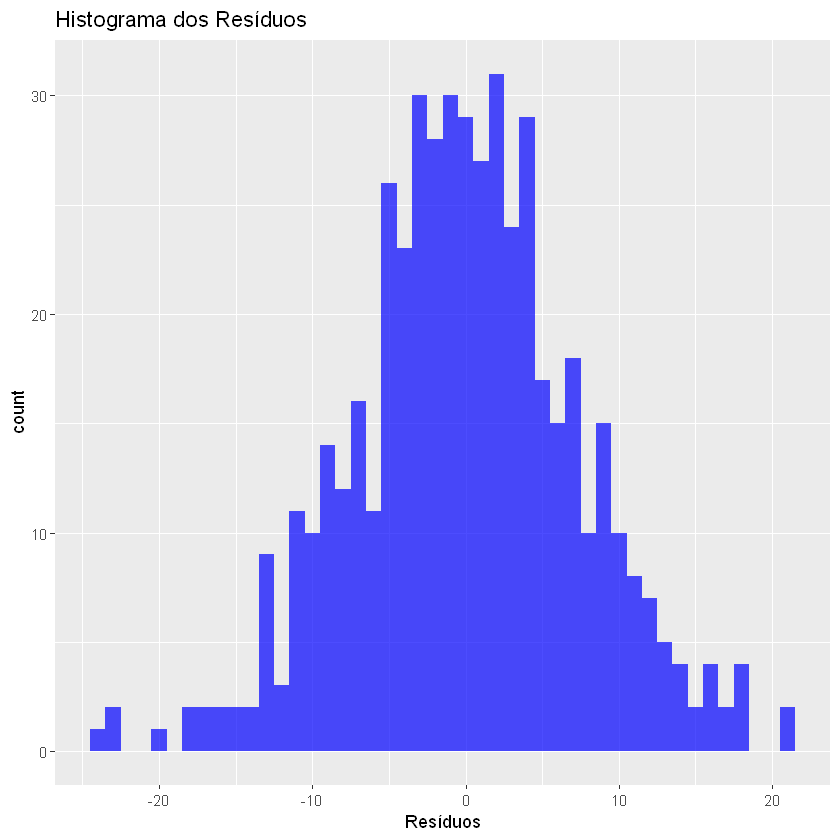

In [21]:
# Histograma dos Resíduos
# Este gráfico ajuda a verificar a normalidade dos resíduos. 
# Um histograma em forma de sino indica que os resíduos estão normalmente distribuídos, indicando que temos um 
# bom modelo de regressão.
ggplot(df_md, aes(x = residuals)) +
  geom_histogram(binwidth = 1, fill = 'blue', alpha = 0.7) +
  ggtitle("Histograma dos Resíduos") +
  xlab("Resíduos")

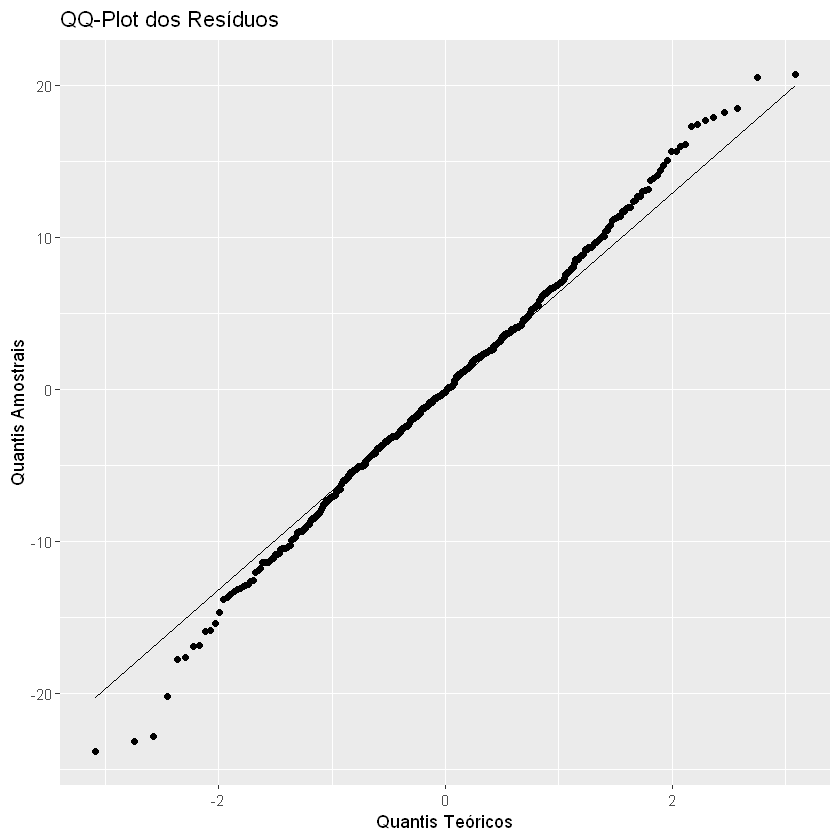

In [22]:
# QQ-plot
# Este gráfico também ajuda a verificar a normalidade dos resíduos. 
# Pontos alinhados em torno da linha diagonal sugerem que os resíduos são normalmente distribuídos, indicando 
# que temos um bom modelo de regressão.
ggplot(df_md, aes(sample = residuals)) +
  geom_qq() +
  geom_qq_line() +
  ggtitle("QQ-Plot dos Resíduos") +
  xlab("Quantis Teóricos") +
  ylab("Quantis Amostrais")

**O gráfico QQ é uma ferramenta gráfica útil para avaliar se os resíduos de um modelo seguem uma distribuição teórica**, geralmente a distribuição normal. Se os pontos no gráfico QQ se alinham aproximadamente com a linha teórica, isso sugere que os resíduos estão próximos de uma distribuição normal, o que é uma suposição comum em muitos modelos estatísticos. Se houver desvios significativos, isso pode indicar violações dessa suposição e pode ser necessário investigar mais a fundo.

## Deploy do Modelo

In [23]:
# Salva o modelo treinado em disco
save(modelo_v3, file = "modelo_v3.RData")

In [24]:
# Carrega o modelo do disco
load("modelo_v3.RData")

In [25]:
# Novos dados (ficticios):
valor_gasto_campanha <- 1350
numero_visualizacoes <- 7300
numero_cliques <- 100

In [26]:
# Criar novos dados para previsão
novos_dados <- data.frame(valor_gasto_campanha = c(1350),
                          numero_visualizacoes = c(7300),
                          numero_cliques = c(100))

### Toda e qualquer transformação aplicada aos dados de treino deve ser aplicada aos dados de teste e novos dados!

In [27]:
# Cria a nova variável conforme foi feito para treinar o modelo
# Toda e qualquer transformação aplicada aos dados de treino 
# deve ser aplicada aos dados de teste e novos dados
novos_dados$taxa_de_clique <- novos_dados$numero_cliques / novos_dados$numero_visualizacoes

In [28]:
# Remove as variáveis que não serão usadas
novos_dados$numero_visualizacoes <- NULL
novos_dados$numero_cliques <- NULL

In [29]:
novos_dados

valor_gasto_campanha,taxa_de_clique
<dbl>,<dbl>
1350,0.01369863


In [30]:
# Fazer previsões
previsoes <- predict(modelo_v3, newdata = novos_dados)

In [31]:
# Exibir previsões
cat("Esperamos este número de usuários convertidos:", as.integer(previsoes))

Esperamos este número de usuários convertidos: 70